<a href="https://colab.research.google.com/github/aibijq/skku_gsb/blob/main/Portfolio_Optimization_PyPortfolioOpt_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 782.3 kB/s eta 0:00:00


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import pypfopt as ppf

from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

import matplotlib.pyplot as plt

In [3]:
def fetch_stock_data(tickers, start_date, end_date):
    # Download stock data
    stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return stock_data


In [18]:
tickers = "TSLA GOOG ESTC BAC SBUX KO DIS"
start_date = "2021-01-01"
end_date = "2024-01-19"
stock_data = fetch_stock_data(tickers, start_date, end_date)
stock_data

[*********************100%%**********************]  7 of 7 completed


,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
Date,,,,,,,
2021-01-04,27.922979,177.102798,141.460007,86.412003,48.158417,97.033066,243.256668
2021-01-05,28.136841,177.860336,145.369995,87.045998,47.629002,97.353065,245.036667
2021-01-06,29.894232,178.538116,142.009995,86.764503,46.113789,98.058929,251.993332
2021-01-07,30.554411,177.999878,150.440002,89.362503,45.602627,97.268364,272.013336
2021-01-08,30.247564,178.109528,152.149994,90.360497,46.624943,99.451843,293.339996
...,...,...,...,...,...,...,...
2024-01-11,33.150002,89.449997,112.290001,143.669998,59.810001,92.940002,227.220001
2024-01-12,32.799999,90.349998,111.940002,144.240005,60.389999,91.980003,218.889999
2024-01-16,32.119999,93.050003,116.580002,144.080002,59.990002,92.699997,219.910004


In [19]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices=stock_data)
mu

BAC     0.043059
DIS    -0.193681
ESTC   -0.057400
GOOG    0.186142
KO      0.076154
SBUX   -0.012717
TSLA   -0.044528
dtype: float64

In [17]:
Sigma = risk_models.risk_matrix(stock_data, method="sample_cov")
Sigma

,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
BAC,0.127313,0.070349,0.049508,0.049233,0.038273,0.062064,0.066441
DIS,0.070349,0.111883,0.066324,0.051952,0.031789,0.059065,0.068040
ESTC,0.049508,0.066324,0.347376,0.083431,0.015166,0.067645,0.146712
GOOG,0.049233,0.051952,0.083431,0.100580,0.026377,0.051633,0.083110
KO,0.038273,0.031789,0.015166,0.026377,0.045435,0.032840,0.024735
SBUX,0.062064,0.059065,0.067645,0.051633,0.032840,0.094440,0.070241
TSLA,0.066441,0.068040,0.146712,0.083110,0.024735,0.070241,0.415867


In [27]:
stock_data.corr()

,BAC,DIS,ESTC,GOOG,KO,SBUX,TSLA
BAC,1.000000,0.654431,0.529517,0.429771,-0.301021,0.226967,0.495888
DIS,0.654431,1.000000,0.836526,0.191279,-0.803322,0.452037,0.280108
ESTC,0.529517,0.836526,1.000000,0.432952,-0.782403,0.475602,0.414026
GOOG,0.429771,0.191279,0.432952,1.000000,-0.055500,0.218684,0.577423
KO,-0.301021,-0.803322,-0.782403,-0.055500,1.000000,-0.419373,-0.154351
SBUX,0.226967,0.452037,0.475602,0.218684,-0.419373,1.000000,-0.170048
TSLA,0.495888,0.280108,0.414026,0.577423,-0.154351,-0.170048,1.000000


In [20]:
### Compute Minimum Variance Portfolio using PyPortfolioOpt
# Create an EfficientFrontier object
ef = EfficientFrontier(mu, Sigma)
# Calculate the minimum volatility portfolio weights
raw_weights = ef.min_volatility()
raw_weights

OrderedDict([('BAC', 0.0),
             ('DIS', 0.0458630723735147),
             ('ESTC', 0.0347733917875775),
             ('GOOG', 0.1336614683331937),
             ('KO', 0.7392856809672339),
             ('SBUX', 0.0464163865384802),
             ('TSLA', 0.0)])

In [21]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('BAC', 0.0),
             ('DIS', 0.04586),
             ('ESTC', 0.03477),
             ('GOOG', 0.13366),
             ('KO', 0.73929),
             ('SBUX', 0.04642),
             ('TSLA', 0.0)])

In [22]:
ef.portfolio_performance(verbose=True)

Expected annual return: 7.0%
Annual volatility: 20.2%
Sharpe Ratio: 0.25


(0.06971081465395465, 0.2015548195013514, 0.24663669554982456)

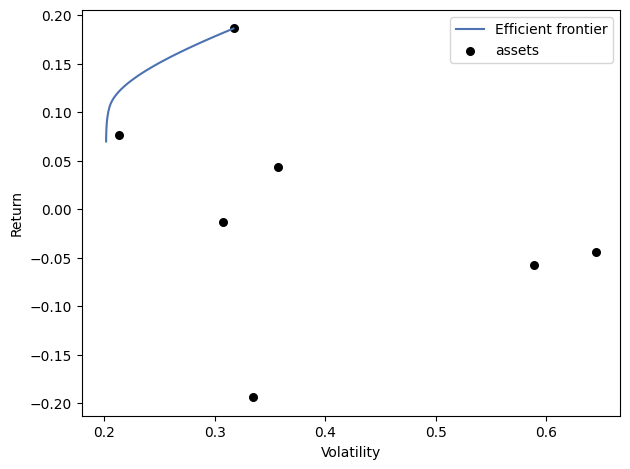

In [23]:
### Plot the Efficient Frontier (Bugfix)
### Change plt.style.use("seaborn-deep") to plt.style.use("seaborn-v0_8-deep") at line 21 of plotting.py
### You can find plotting.py in "~/venv/yourenvname/lib/python3.10/site-packages/pypfopt"

import matplotlib.pyplot as plt
from pypfopt import plotting

ef = EfficientFrontier(mu, Sigma)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

0 BAC
1 DIS
2 ESTC
3 GOOG
4 KO
5 SBUX
6 TSLA


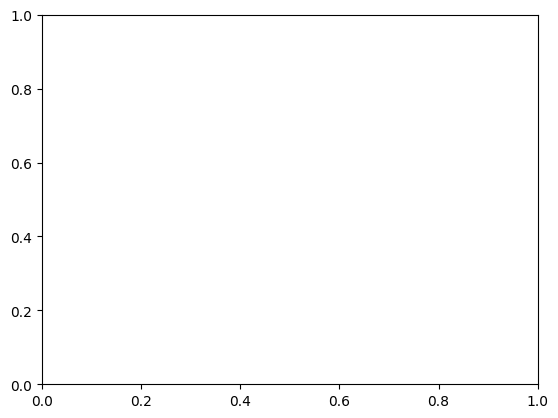

In [29]:
# Plot the efficient frontier with asset labels
fig, ax = plt.subplots()
# plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Annotate each point with the asset labels
for i, txt in enumerate(ef.tickers):
    print(i, txt)
    # ax.annotate(txt, (ef.weights[i], ef.portfolio_performance()[0][i]))

plt.show()